<font size="5">Import Libraries</font>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

<font size="5">Read Image & Convert to Grayscale</font>

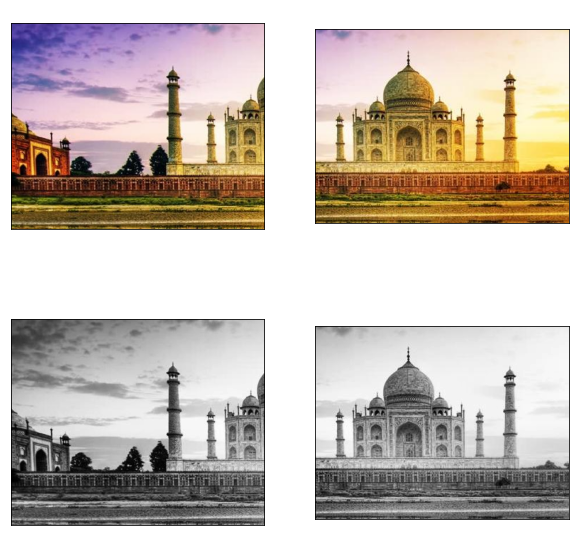

In [2]:
img1 = cv2.imread('./1b.jpg')
img1_gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('./1a.jpg')
img2_gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

plt.figure(0, (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
title1 = plt.title('Image 1a Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
title1 = plt.title('Image 1b Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(img2_gray, cmap='gray')
title1 = plt.title('Image 1a Grayscale')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(img1_gray, cmap='gray')
title1 = plt.title('Image 1b Grayscale')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.show()

<font size="5">Keypoint & Feature Descriptor Calculation Using SIFT</font>

In [3]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

<font size="5">Feature Matching Using Brute Force Matcher</font>

In [4]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [5]:
good = []
for m in matches:
    if m[0].distance < 0.5 * m[1].distance:
        good.append(m)
        matches = np.asarray(good)

In [6]:
if len(matches[:,0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertionError("Can’t find enough keypoints.")

<font size="5">Warp & Stitch Image</font>

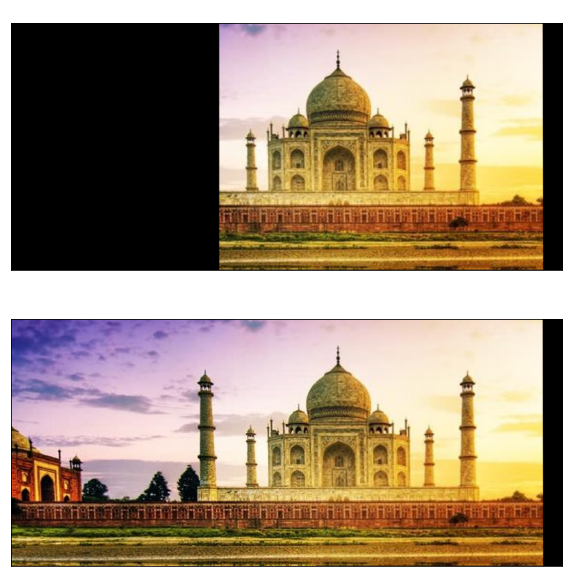

In [7]:
dst = cv2.warpPerspective(img1, H, (img2.shape[1] + img1.shape[1], img2.shape[0]))

plt.figure(0, (10, 10))

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
title = plt.title('Warped Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])

dst[0:img2.shape[0], 0:img2.shape[1]] = img2

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
title = plt.title('Stitched Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()

<font size="5">Trim Black Border</font>

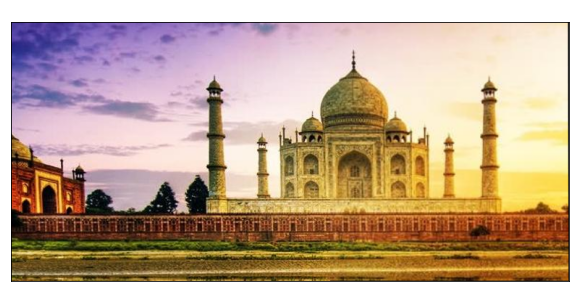

In [8]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame

dst = trim(dst)

plt.figure(0, (10, 10))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
title = plt.title('Cropped Stitched Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()

<font size="5">Read Image & Convert to Grayscale</font>

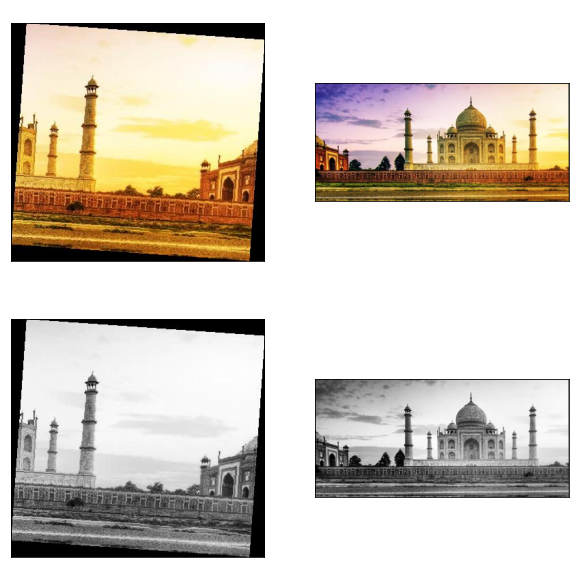

In [9]:
img3 = cv2.imread('./1c.jpg')
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

img4 = dst.copy()
img4_gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

plt.figure(0, (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
title1 = plt.title('Image 1c Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
title1 = plt.title('Image 1a + 1b Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 3)
plt.imshow(img3_gray, cmap='gray')
title1 = plt.title('Image 1c Grayscale')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(2, 2, 4)
plt.imshow(img4_gray, cmap='gray')
title1 = plt.title('Image 1a + 1b Grayscale')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.show()

<font size="5">Keypoint & Feature Descriptor Calculation Using SIFT</font>

In [10]:
sift = cv2.xfeatures2d.SIFT_create()

kp3, des3 = sift.detectAndCompute(img3_gray, None)
kp4, des4 = sift.detectAndCompute(img4_gray, None)

<font size="5">Feature Matching Using Brute Force Matcher</font>

In [11]:
bf = cv2.BFMatcher()
matches2 = bf.knnMatch(des3, des4, k=2)

In [12]:
good2 = []
for m in matches2:
    if m[0].distance < 0.5 * m[1].distance:
        good2.append(m)
        matches2 = np.asarray(good2)

In [13]:
if len(matches2[:,0]) >= 4:
    src2 = np.float32([ kp3[m.queryIdx].pt for m in matches2[:,0] ]).reshape(-1,1,2)
    dst2 = np.float32([ kp4[m.trainIdx].pt for m in matches2[:,0] ]).reshape(-1,1,2)
    H2, masked2 = cv2.findHomography(src2, dst2, cv2.RANSAC, 5.0)
else:
    raise AssertionError("Can’t find enough keypoints.")

<font size="5">Warp & Stitch Image</font>

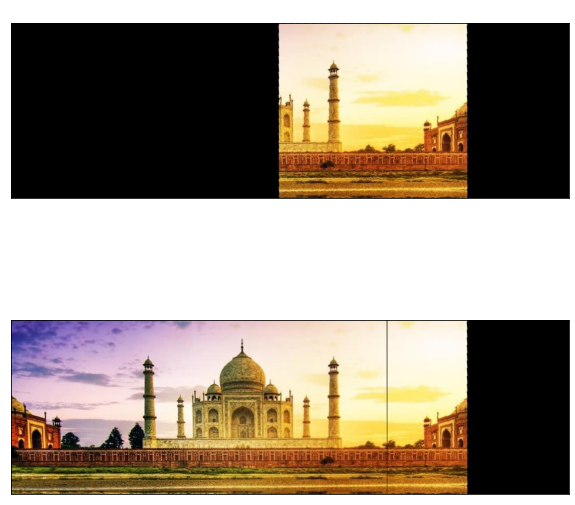

In [14]:
dst2 = cv2.warpPerspective(img3, H2, (img4.shape[1] + img3.shape[1], img4.shape[0]))

plt.figure(0, (10, 10))

plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
title = plt.title('Warped Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])

dst2[0:img4.shape[0], 0:img4.shape[1]] = img4

plt.subplot(2, 1, 2)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
title = plt.title('Stitched Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()

<font size="5">Trim Black Border</font>

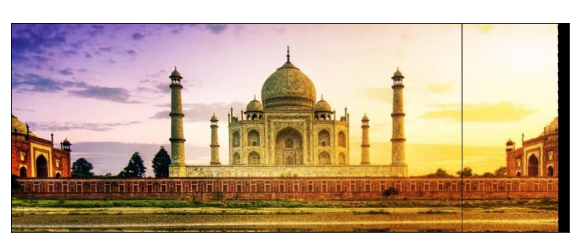

In [15]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop bottom
    elif not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop left
    elif not np.sum(frame[:,0]):
        return trim(frame[:,1:]) 
    #crop right
    elif not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])    
    return frame

dst2 = trim(dst2)

plt.figure(0, (10, 10))

plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))
title = plt.title('Final Cropped Stitched Image')
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()